In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as maps;

We consider a 3 layered earth for the calculation of geotherm. The uppermost layer (upper crust) is the heat producing crust while the middle layer (lower crust) has a very low heat production. The procedure for the calculation of geotherm by 1-D conduction heat transfer as suggested by Fowler, 1996 is used.

The values were taken from Roy and Rao, 2003 and Roy and Mareschal, 2011 as:
* Q1= 40* (10**-3) # surface heat flow rate (or 36)
* Q2= 18* (10**-3) # heat flow rate across Moho (our estimates come approx the same)
* A1= 2.4* (10**-6) # heat production in upper crust
* A2= 0.16* (10**-6) # heat production in lower crust
* z2= 39* 1000; # heat producing crust
* z2= 39* 1000; # depth to Moho
* z3= 200* 1000; # depth to LAB
* k= 3, 2.5, 3.5 # thermal conductivity of the upper crust, lower crust, mantle
* Ts= 300 K # Temperature at the surface

Roy and Mareschal, 2011 report a mantle heat production of 0-0.02  $\mu$W m-3 which is included in the calculation of geotherm into the mantle.

Am= 0.02* (10**-6) # mantle heat production
Q2= 18* (10**-3) # heat flow rate across Moho
km= # thermal conductivity of Moho
Tm= # Temperature of Moho, calculated from our geotherm data

Moho temperature belong to the range 285- 410 deg C according to heat flow data.

In [2]:
def geotherm(Qs, Ts, A, k, z):
    """
    Qs= Surface Heat Flow
    Ts= Surface Temperature
    A= vector of heat production rate
    k= vector of thermal conductivity
    """
    
    n= len(z); # number of layers
    Q= Qs;
    T= Ts;
    z_1= 0;
    depth= np.array([]);
    gtherm= np.array([]);
    for i in range(0, n):
        print(Q*1000)
        Z= np.arange(z_1, z[i]+1, 1);
        
        temp= -A[i]/2/k[i]* Z*Z+ (Q+ A[i]*z_1)/k[i]* Z + (T- Q/k[i]*z_1- A[i]/2/k[i]* z_1**2);
        gtherm= np.hstack((gtherm, temp));
        depth= np.hstack((depth, Z));
        Q= Q+ A[i]*(z_1- z[i]);
        T= temp[-1]; 
        z_1= z[i];
        print(Q, "\t", temp[-1])
    
    print("Temperature at lowermost layer is %d K" %(T));
    print("Heat flow estimated at lowermost interface is %1.5f Wm-2 K-1" %(Q));
    return [gtherm, depth];


In [18]:
Qs= 40* (10**-3);
Ts= 300; 
A= np.array([1.5, 0.25, 0.02])* (10**-6);
k= np.array([3.0, 2.5, 3.5]);
z= np.array([10, 39, 190])* 1000;

gtherm, data_z= geotherm(Qs, Ts, A, k, z);

40.0
0.025 	 408.33333333333337
25.0
0.017750000000000002 	 656.2833333333333
17.750000000000004
0.014730000000000002 	 1356.9233333333334
Temperature at lowermost layer is 1356 K
Heat flow estimated at lowermost interface is 0.01473 Wm-2 K-1


In [19]:
gtherm= np.interp(np.arange(0, z[-1]/1000), data_z/1000, gtherm)
data_z= np.arange(0, z[-1]/1000);

In [20]:
def plot_geotherm(ax, z, data_z, T):
    """
    z= vector of [heat producing crust, Moho depth, depth to LAB]
    data_z= depth vector in km
    T= Temperature in K
    """
    ax.plot(T, data_z, label= "Geotherm");
    ax.set_ylim([z[-1]/1000+ 50, 0]);
    #ax.set_xlim([Ts, Ts+3000])
    ax.grid('on');
    moho= z[1]/1000*np.ones_like(T);
    LAB= z[2]/1000*np.ones_like(T);
    range_rho= np.logspace(1, 5, len(data_z))
    ax.fill_between(T, moho, 0*LAB, color= 'green', alpha= 0.3, label= 'crust');
    ax.fill_between(T, moho, LAB, color= 'yellow', alpha= 0.25, label= 'Lithospheric mantle');
    ax.fill_between(T, LAB, 300*LAB/LAB, color= 'orange', alpha= 0.35, label= 'Aesthenosphere');
    ax.legend();
    ax.set_ylabel("Depth (km)", fontsize= 14);
    ax.set_xlabel("Temperature (K)", fontsize= 14);
    return ax;

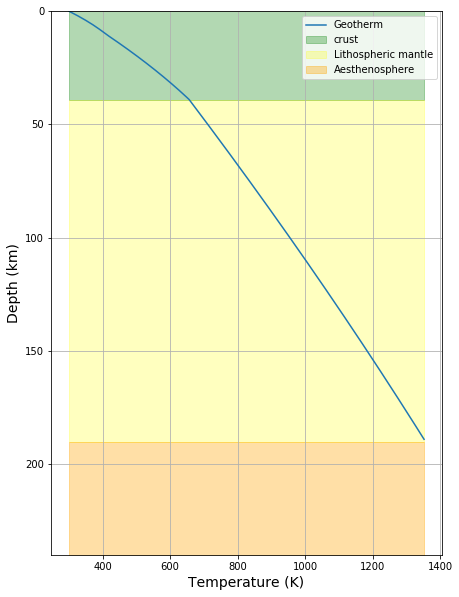

In [21]:
#fig= maps.Figure(figsize= (7,10));
#ax= fig.add_subplot(111);
fig, ax= maps.subplots(1, figsize= (7,10));
ax= plot_geotherm(ax= ax, z= z, data_z= data_z, T= gtherm);
fig.savefig("C:/Users/hp/Desktop/geotherm.jpg")